# <font color='red'> Case AME Digital </font>

### Candidato: Rodrigo Zalli Rodriguez
#### LinkedIn: https://www.linkedin.com/in/rzrodriguez/
#### Github: https://github.com/rzrodriguez

## Descrição do problema:

Dentro da empresa existe uma equipe que é responsável por definir as características de produtos
que vão ser construídos. Para uma categoria de liquidificadores, por exemplo, essa equipe fica
responsável por definir a cor, volume do copo, material do copo ou mesmo se vai ter um filtro para
suco de frutas.

Para definir as características das diferentes categorias de produtos, a equipe procura entender
quando o cliente se interessa por um produto. É nesse ponto que o time do Labs é chamado. <b>O seu
objetivo principal é desenvolver um modelo que consiga classificar o produto entre "interessante" e
"não interessante" dados os atributos do mesmo</b>. Além disso, é desejável que você também consiga
<b>indicar quais são os atributos e respectivos valores que mais impulsionam o interesse do cliente</b>.

Mais importante que o resultado final é a sua estratégia de solução. Deixe claro cada passo da sua
solução e explique as decisões tomadas durante o processo. Também é importante que você nos
mande o seu código desenvolvido (Python ou Scala). Uma sugestão é usar Jupyter Notebook.
Assim, você consegue explicar cada ponto da sua estratégia de forma mais explícita.

Esperamos receber de você um documento com a explicação do trabalho desenvolvido.

Bom trabalho!

## Conjunto de dados:
O conjunto de dados possui os atributos de cada produto de uma categoria de panelas e se houve ou
não interesse do cliente ao visualizar o produto no site. Cada linha é o registro da visualização de
um cliente em determinado momento.

In [72]:
# Imports
# Numpy e Pandas para manipulação dos dados
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
#from sklearn.preprocessing import LabelEncoder

# Ignorar Warnings para visualização mais limpa
import warnings
warnings.filterwarnings('ignore')

# Matplotlib and seaborn para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Método para padronizar e categorizar os dados
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Modelos utilizados
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Seleção de melhores parâmetros
from sklearn.model_selection import RandomizedSearchCV

# Métricas de score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Definindo estilo utilizado nos gráficos
plt.style.use('ggplot')

## <font color='red'> Importando os dados </font>

In [3]:
ame = pd.read_csv('problem1_dataset.csv')

## <font color='red'> Primeira checagem dos dados </font>

In [4]:
ame.head()

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,...,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
0,264220456,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,...,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,86.709770,199.990000,0.0
1,238630912,22.0,NaN,ALUMINIO,COLORIDO,NaN,24.0,TRAMONTINA,No,no,...,40.0,12.0,NAO,NAO,1.0,PIPOQUEIRA,NAO,73.156401,105.112581,0.0
2,218228122,24.0,NaN,INOX,INOX,NaN,20.0,LA CUISINE,Yes,no,...,20.0,3.0,NAO,NAO,1.0,ESPAGUETEIRA,NAO,952.331024,139.990000,0.0
3,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,...,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,637.759106,103.293333,1.0
4,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,...,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,478.531428,103.330242,0.0


In [5]:
ame.shape

(180275, 21)

In [6]:
ame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180275 entries, 0 to 180274
Data columns (total 21 columns):
ITEM_ID              180275 non-null int64
ALTURA               171007 non-null float64
CAPACIDADE_(L)       76671 non-null float64
COMPOSICAO           156978 non-null object
COR                  170251 non-null object
FORMATO              90011 non-null object
LARGURA              171007 non-null float64
MARCA                180001 non-null object
PARA_LAVA_LOUCAS     104086 non-null object
PARA_MICRO_ONDAS     86402 non-null object
PESO                 98524 non-null float64
PROFUNDIDADE         171007 non-null float64
TEMPO_GARANTIA       122770 non-null float64
TEM_FERRO_FUNDIDO    180275 non-null object
TEM_GRELHA           180275 non-null object
TEM_TAMPA            180275 non-null float64
TIPO_PRODUTO         180275 non-null object
TIPO_WOK             180275 non-null object
SESSION_ID           178273 non-null float64
ITEM_PRICE           167178 non-null float64
INTER

Muitos dados missing (vazios ou 'NaN') e valores categóricos. Isto será tratado mais à frente na seção de limpeza de dados e criação de dummies.

In [7]:
ame.describe()

,ITEM_ID,ALTURA,CAPACIDADE_(L),LARGURA,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_TAMPA,SESSION_ID,ITEM_PRICE,INTERESTED
count,1.802750e+05,171007.000000,76671.000000,171007.000000,98524.000000,171007.000000,122770.000000,180275.000000,178273.000000,167178.000000,180275.000000
mean,2.156229e+08,30.575636,4.234668,27.882157,311.259118,34.797386,13.870742,0.440704,499.757195,127.831019,0.086130
std,1.030257e+08,14.856403,1.699274,10.494943,1727.585999,15.179911,43.641581,0.496473,288.841689,137.298241,0.280556
min,2.939160e+05,2.000000,0.045000,4.500000,0.619000,2.500000,1.000000,0.000000,1.011194,0.550000,0.000000
25%,2.273688e+08,19.000000,3.100000,20.000000,120.000000,19.800000,3.000000,0.000000,249.343773,74.990000,0.000000
50%,2.485863e+08,30.500000,4.500000,27.800000,160.000000,38.500000,6.000000,0.000000,500.759182,104.482418,0.000000
75%,2.567376e+08,42.700000,6.000000,35.000000,190.000000,47.000000,12.000000,1.000000,749.204738,146.327727,0.000000
max,2.711264e+10,84.000000,11.000000,91.000000,44400.000000,148.000000,300.000000,1.000000,1000.984988,2274.990000,1.000000


Observando as estatísticas básicas das colunas númericas, já podemos suspeitar que algumas dessas podem possuir valores discrepantes (outliers). Também podemos ver que talvez exista algum problema com os valores de preços, uma vez que, um preço mínimo de 0.55 em uma panela pode ser muito baixo. 
Vamos investigar esses dois possíveis problemas em seguida na limpeza dos dados.

## <font color='red'> Limpeza dos dados (Data Cleaning) </font>

Procurando detectar e corigir dados incompletos, incorretos, irrelevantes e destoantes.

In [8]:
# Definindo função para detectar colunas com dados faltantes e agrupa-las em um tabela que ordena as colunas com a maior 
# porcentagem de dados faltantes para a menor.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("O dataframe tem " + str(df.shape[1]) + " colunas.\n"      
            "" + str(mis_val_table_ren_columns.shape[0]) +
              " colunas tem valores missing.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(ame)

O dataframe tem 21 colunas.
14 colunas tem valores missing.


,Missing Values,% of Total Values
CAPACIDADE_(L),103604,57.5
PARA_MICRO_ONDAS,93873,52.1
FORMATO,90264,50.1
PESO,81751,45.3
PARA_LAVA_LOUCAS,76189,42.3
TEMPO_GARANTIA,57505,31.9
COMPOSICAO,23297,12.9
ITEM_PRICE,13097,7.3
COR,10024,5.6
ALTURA,9268,5.1


* Colunas com valores nulos acima de 40% serão descartadas, devido a alta falta de informação dos dados;
* As colunas 'SEASSON_ID' e 'ITEM_ID' também serão descartadas, pois não são relevantes para nossa modelagem;
* As demais colunas numéricas com dados faltantes serão preenchidas com a mediana dos valores daquela coluna, para colunas categóricas utilizaremos a moda (valor mais comum da coluna).

In [10]:
# Removendo colunas
drop_cols = ['CAPACIDADE_(L)', 'PARA_MICRO_ONDAS', 'FORMATO', 'PESO', 'PARA_LAVA_LOUCAS', 'SESSION_ID', 'ITEM_ID']
ame = ame.drop(drop_cols, axis = 1)

Antes de imputarmos dados, vamos verificar se existem outliers e se existem problemas na distribuição de preços:

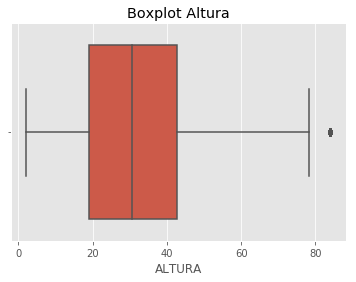

In [11]:
plt.title('Boxplot Altura')
sns.boxplot(ame['ALTURA']);

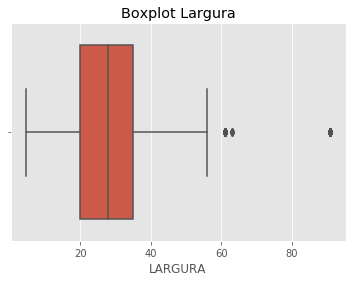

In [12]:
plt.title('Boxplot Largura')
sns.boxplot(ame['LARGURA']);

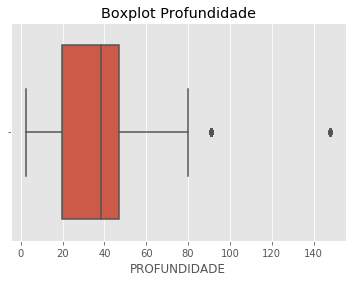

In [13]:
plt.title('Boxplot Profundidade')
sns.boxplot(ame['PROFUNDIDADE']);

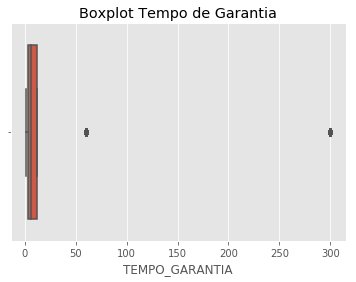

In [14]:
plt.title('Boxplot Tempo de Garantia')
sns.boxplot(ame['TEMPO_GARANTIA']);

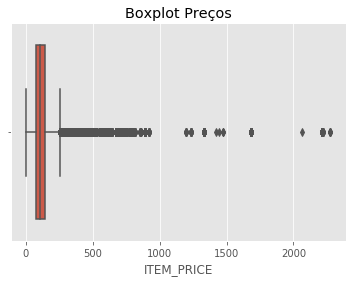

In [15]:
plt.title('Boxplot Preços')
sns.boxplot(ame['ITEM_PRICE']);

Como podemos observar, existem outliers em todas as colunas numéricas, no caso de variáveis de características das panelas, devem se tratar de características especiais e não comuns nesses produtos, como garantia de 300 meses e medidas muito maiores que o comum para panelas. 
Existem também alguns produtos cujos preços fogem muito dos demais. 
A fim de não contaminar o modelo a ser construído com características atípicas, vamos remover esses outliers através do método IQR.

In [16]:
# Checando produtos com tempo de garantia nulo:
garantia_nula = ame[ame['TEMPO_GARANTIA'].isnull()]
garantia_nula.groupby(by=['MARCA']).mean()

,ALTURA,LARGURA,PROFUNDIDADE,TEMPO_GARANTIA,TEM_TAMPA,ITEM_PRICE,INTERESTED
MARCA,,,,,,,
ALUMINIO RAMOS,11.320588,37.832353,34.311765,NaN,0.608824,84.168123,0.058824
AT.HOME,19.700000,19.700000,20.200000,NaN,0.000000,44.838538,0.132479
BRINOX,10.191997,23.330662,36.931151,NaN,0.192146,82.992748,0.071853
CERAFLAME,19.000000,23.500000,23.500000,NaN,1.000000,105.387911,0.132000
CLASSIC HOME,18.000000,23.500000,22.000000,NaN,1.000000,99.900000,0.000000
EURO HOME,33.593088,45.413601,21.069119,NaN,0.000000,76.093694,0.117057
FUMIL,28.830021,32.355894,41.138622,NaN,0.495031,89.887474,0.079164
LA CUISINE,33.316104,27.690909,10.327273,NaN,0.997403,126.592821,0.059740
MERIDIONAL,21.000000,22.000000,22.000000,NaN,0.000000,77.609048,0.093750


Com relação à coluna 'TEMPO_GARANTIA', algumas linhas poderiam se tratar de produtos que não possuem garantia, já que o dataset original não possui nenhuma linha com tempo de garantia igual a zero. Porém, os produtos com tempo de garantia nulo não apresentam característica padrão, ficando muito difícil, com as informações disponíveis, assumir a hipótese de que dados com tempo de garantia nulos representam produtos sem garantia. Sendo assim, seguiremos a mesma estratégia utilizada nas demais colunas numéricas.

In [17]:
colunas_numericas = ['ALTURA', 'LARGURA', 'PROFUNDIDADE', 'TEMPO_GARANTIA', 'ITEM_PRICE']

def remove_outliers_iqr(df, cols):
    
    for col in cols:
        #Encontrando outliers - IQR Score
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        #Removendo outliers
        outliers = df[(df[col] < (q1 - 1.5 * iqr))|(df[col] > (q3 + 1.5 * iqr))].index
        df.drop(outliers, axis = 0, inplace=True)
    
remove_outliers_iqr(ame, colunas_numericas)

Com os outliers removidos, vamos imputar os dados missing com suas medianas, mas antes vamos investigar os preços estranhamente baixos:

In [18]:
# Listando produtos com preços abaixo de 10
ame[ame['ITEM_PRICE'] < 10]

,ALTURA,COMPOSICAO,COR,LARGURA,MARCA,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,ITEM_PRICE,INTERESTED
42564,6.5,ALUMINIO,VERMELHO,18.8,BRINOX,33.5,NaN,NAO,NAO,0.0,FRIGIDEIRA,NAO,4.90,1.0
92228,22.0,ALUMINIO,COLORIDO,24.0,TRAMONTINA,40.0,12.0,NAO,NAO,1.0,LEITEIRA,NAO,0.55,0.0
130125,6.5,ALUMINIO,VERMELHO,18.8,BRINOX,33.5,NaN,NAO,NAO,0.0,FRIGIDEIRA,NAO,4.90,1.0
174012,6.5,ALUMINIO,VERMELHO,18.8,BRINOX,33.5,NaN,NAO,NAO,0.0,FRIGIDEIRA,NAO,4.90,1.0


Temos 4 produtos no dataset com preços abaixo de 10 reais (assumindo que os preços do dataset estão em reais). Vamos retirar esses produtos da análise, já que apresentam valores estranhamente baixos para os produtos estudados.

In [19]:
# Removendo preços muito baixos para os produtos representados no dataframe
precos_baixos = ame[ame['ITEM_PRICE'] < 10].index

ame.drop(precos_baixos, axis=0, inplace=True)

Agora podemos imputar a mediana dos dados sem enviesá-los com valores incorretos ou outliers

In [20]:
# Verificando novamente colunas com valores missing:
missing_values_table(ame)

O dataframe tem 14 colunas.
8 colunas tem valores missing.


,Missing Values,% of Total Values
TEMPO_GARANTIA,55681,32.9
COMPOSICAO,21111,12.5
ITEM_PRICE,12729,7.5
COR,9664,5.7
ALTURA,6534,3.9
LARGURA,6534,3.9
PROFUNDIDADE,6534,3.9
MARCA,272,0.2


In [21]:
# Colunas numéricas serão imputadas com sua mediana, já colunas categóricas com a moda

# Colunas numéricas
ame['TEMPO_GARANTIA'].fillna(ame['TEMPO_GARANTIA'].median(), inplace=True)
ame['ITEM_PRICE'].fillna(ame['ITEM_PRICE'].median(), inplace=True)
ame['ALTURA'].fillna(ame['ALTURA'].median(), inplace=True)
ame['LARGURA'].fillna(ame['LARGURA'].median(), inplace=True)
ame['PROFUNDIDADE'].fillna(ame['PROFUNDIDADE'].median(), inplace=True)

# Colunas Categoricas
ame['COMPOSICAO'].fillna(ame['COMPOSICAO'].mode()[0], inplace=True)
ame['COR'].fillna(ame['COR'].mode()[0], inplace=True)
ame['MARCA'].fillna(ame['MARCA'].mode()[0], inplace=True)

In [22]:
# Verificando se todas as colunas foram preenchidas
missing_values_table(ame)

O dataframe tem 14 colunas.
0 colunas tem valores missing.


,Missing Values,% of Total Values


Agora que os dados foram limpos, vamos fazer uma análise exploratória nos dados.

## <font color='red'> Análise Exploratória dos dados (EDA) </font>

#### INTERESTED

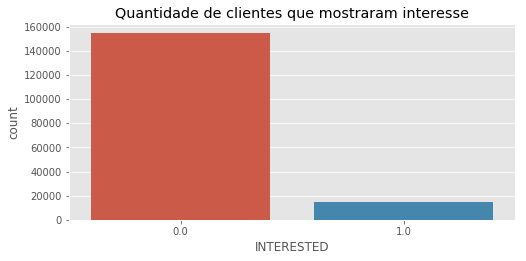

In [23]:
plt.figure(figsize=(8,0.45*8))
plt.title('Quantidade de clientes que mostraram interesse')
sns.countplot(ame['INTERESTED']);

In [24]:
ame['INTERESTED'].value_counts()

0.0    154602
1.0     14860
Name: INTERESTED, dtype: int64

In [25]:
porc_nao_interesse = len(ame[ame['INTERESTED'] < 1])/len(ame['INTERESTED'])
porc_interesse = len(ame[ame['INTERESTED'] == 1])/len(ame['INTERESTED'])

print('Clientes que não mostraram interesse representam %0.2f%% do total.' % (porc_nao_interesse))
print('Clientes que mostraram interesse representam %0.2f%% do total.' % (porc_interesse))

Clientes que não mostraram interesse representam 0.91% do total.
Clientes que mostraram interesse representam 0.09% do total.


Nossa variável de interesse está altamente desbalanceada, registros com não interesse são muito mais comuns do que com interesse. Este desbalanceado deve ser levado em conta na hora de montarmos o modelo preditivo. Modelos mais 'simples', como a regressão logística, pode apresentar problemas na classificação.

#### ALTURA

In [26]:
ame['ALTURA'].describe()

count    169462.000000
mean         30.728773
std          14.164865
min           2.000000
25%          19.600000
50%          30.500000
75%          42.700000
max          78.250000
Name: ALTURA, dtype: float64

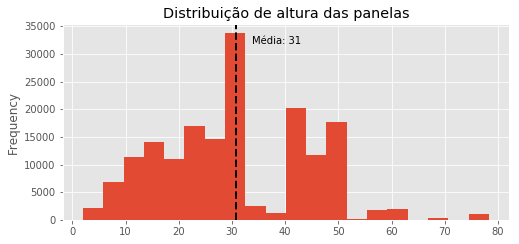

In [27]:
plt.figure(figsize=(8,0.45*8))
ame['ALTURA'].plot.hist(bins=20)
plt.title('Distribuição de altura das panelas')

# Mostrando a média no gráfico
_, max_ = plt.ylim()
plt.text(ame['ALTURA'].mean() + ame['ALTURA'].mean()/10, 
         max_ - max_/10, 
         'Média: {:.0f}'.format(ame['ALTURA'].mean()))
plt.axvline(ame['ALTURA'].mean(), color='k', linestyle='dashed', linewidth=2);

#### COMPOSICAO

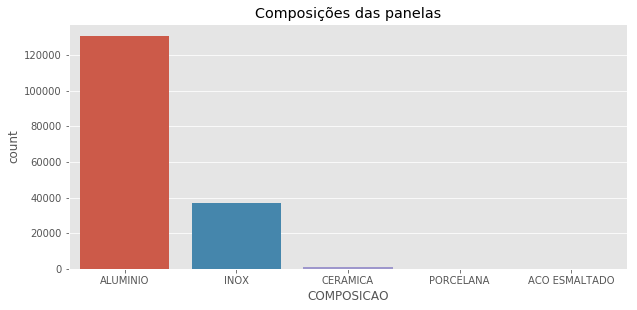

In [28]:
plt.figure(figsize=(10,0.45*10))
plt.title("Composições das panelas")
sns.countplot(ame['COMPOSICAO']);

In [29]:
ame['COMPOSICAO'].value_counts()

ALUMINIO         130912
INOX              37073
CERAMICA           1208
PORCELANA           139
ACO ESMALTADO       130
Name: COMPOSICAO, dtype: int64

A grande maioria das panelas são compostas de alumínio ou inox. Vamos analisar quais composições despertaram maior interesse dos clientes

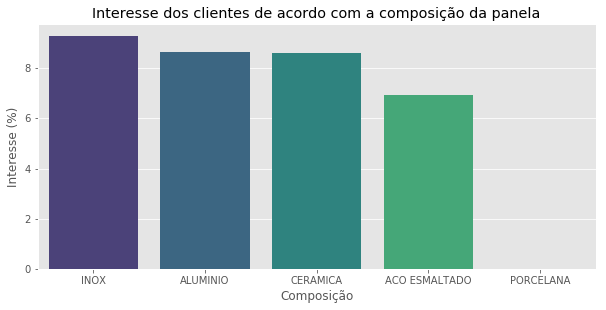

In [30]:
# Checando se mundanças nesta característica gera diferenças no interesse dos clientes
composicao_interesse = []
composicao_types = ame['COMPOSICAO'].unique() 

for i in composicao_types:
    composicao_interesse.append((ame[ame['COMPOSICAO'] == i]['INTERESTED'].mean())*100)

composicao_int = pd.DataFrame(data=composicao_interesse, index=composicao_types, columns=['Interesse (%)'])
composicao_int = composicao_int.sort_values(by='Interesse (%)', ascending=False)
plt.figure(figsize=(10,0.45*10))
plt.title('Interesse dos clientes de acordo com a composição da panela')
ax = sns.barplot(x=composicao_int.index, y=composicao_int['Interesse (%)'], palette='viridis')
plt.xlabel('Composição');

Panelas de porcelana não despertam interesse dos clientes do dataset. Irox e Alumínio são as favoritas.

#### COR 

In [31]:
ame['COR'].value_counts()

INOX         40714
PRETO        28964
VERMELHO     28594
CEREJA       23680
COLORIDO      8671
GRAFITE       7947
VINHO         6405
GOIABA        5238
AMARELO       4332
PRATA         3744
COBRE         2290
AZUL          1746
LARANJA       1720
VERDE         1325
TURQUESA      1100
ROXO           835
CHOCOLATE      831
BERINGELA      585
BRANCO         289
MARROM         160
ROSA           142
CINZA          122
FENDI           24
ACACIA           4
Name: COR, dtype: int64

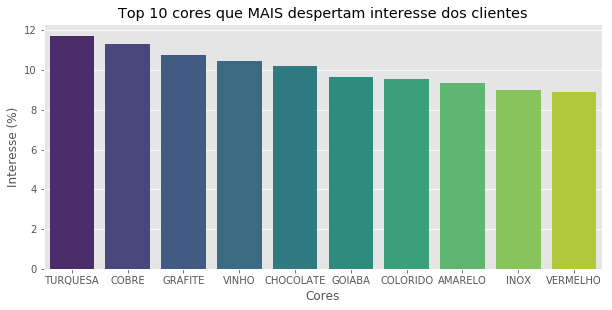

In [32]:
# Checando Top10 cores que mais geram interesse nos clientes
cor_interesse = []
cor_types = ame['COR'].unique() 

for i in cor_types:
    cor_interesse.append((ame[ame['COR'] == i]['INTERESTED'].mean())*100)

cor_int = pd.DataFrame(data=cor_interesse, index=cor_types, columns=['Interesse (%)'])
cor_int = cor_int.sort_values(by='Interesse (%)', ascending=False)
cor_int_top10 = cor_int.head(10)
plt.figure(figsize=(10,0.45*10))
plt.title('Top 10 cores que MAIS despertam interesse dos clientes')
ax = sns.barplot(x=cor_int_top10.index, y=cor_int_top10['Interesse (%)'], palette='viridis')
plt.xlabel('Cores');

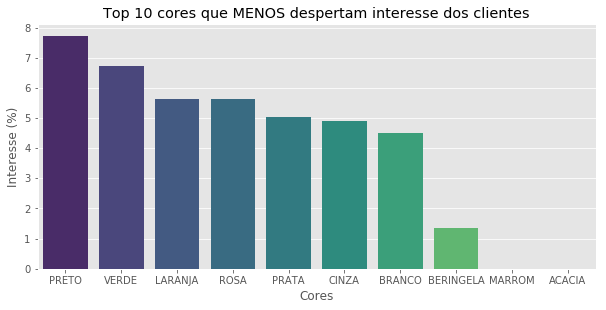

In [33]:
# Checando Top10 cores que menos geram interesse nos clientes
cor_int_top10 = cor_int.tail(10)
plt.figure(figsize=(10,0.45*10))
plt.title('Top 10 cores que MENOS despertam interesse dos clientes')
ax = sns.barplot(x=cor_int_top10.index, y=cor_int_top10['Interesse (%)'], palette='viridis')
plt.xlabel('Cores');

Panelas de cor turquesa, cobre e grafite são as campeãs de interesse. 
Já panelas de cor acácia, marrom e beringela não despertam pouco ou nenhum interesse dos clientes no dataset. 

#### LARGURA

In [34]:
ame['LARGURA'].describe()

count    169462.000000
mean         27.542209
std           9.589065
min           4.500000
25%          20.000000
50%          26.500000
75%          34.200000
max          56.000000
Name: LARGURA, dtype: float64

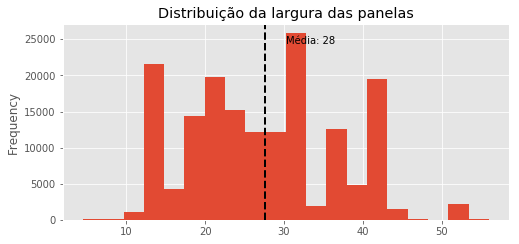

In [35]:
plt.figure(figsize=(8,0.45*8))
ame['LARGURA'].plot.hist(bins=20)
plt.title('Distribuição da largura das panelas')

# Mostrando a média no gráfico
_, max_ = plt.ylim()
plt.text(ame['LARGURA'].mean() + ame['LARGURA'].mean()/10, 
         max_ - max_/10, 
         'Média: {:.0f}'.format(ame['LARGURA'].mean()))
plt.axvline(ame['LARGURA'].mean(), color='k', linestyle='dashed', linewidth=2);

#### MARCA

In [36]:
ame['MARCA'].value_counts()

TRAMONTINA                      69704
LA CUISINE                      32241
PANELA MINEIRA                  11727
BRINOX                           8142
VEC                              7728
EURO HOME                        6801
FUMIL                            5781
EURO                             4450
HERCULES                         4080
ALUMINIO FORTALEZA               2322
PANELUX                          2272
SUN GUIDER                       1970
MTA                              1781
ROCHEDO                          1645
DONA CHEFA                       1357
CERAFLAME                        1208
AT.HOME                          1170
JOMAFE                           1146
HAPPYCALL                        1034
ELECTROLUX                        917
ALUMINIO RAMOS                    791
MIMO STYLE                        283
PRAVA                             139
PRAVAS                            130
TRAMONTINA DESIGN COLLECTION      112
CONSUL                            112
FORMA       

In [37]:
# Agrupando as marcas 'TRAMONTINA' e 'TRAMONTINA DESIGN COLLECTION' em uma só marca para facilitar a análise
ame['MARCA'] = ame['MARCA'].str.replace('TRAMONTINA DESIGN COLLECTION', 'TRAMONTINA')

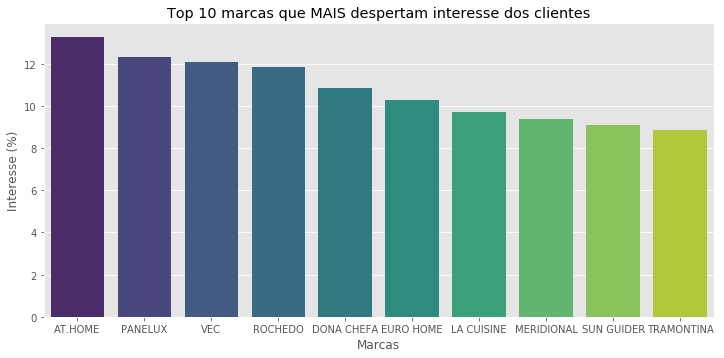

In [38]:
# Checando Top10 marcas que mais geram interesse nos clientes
marca_interesse = []
marca_types = ame['MARCA'].unique() 

for i in marca_types:
    marca_interesse.append((ame[ame['MARCA'] == i]['INTERESTED'].mean())*100)

marcas_int = pd.DataFrame(data=marca_interesse, index=marca_types, columns=['Interesse (%)'])
marcas_int = marcas_int.sort_values(by='Interesse (%)', ascending=False)
marcas_int_top10 = marcas_int.head(10)
plt.figure(figsize=(12,0.45*12))
plt.title('Top 10 marcas que MAIS despertam interesse dos clientes')
ax = sns.barplot(x=marcas_int_top10.index, y=marcas_int_top10['Interesse (%)'], palette='viridis')
plt.xlabel('Marcas');

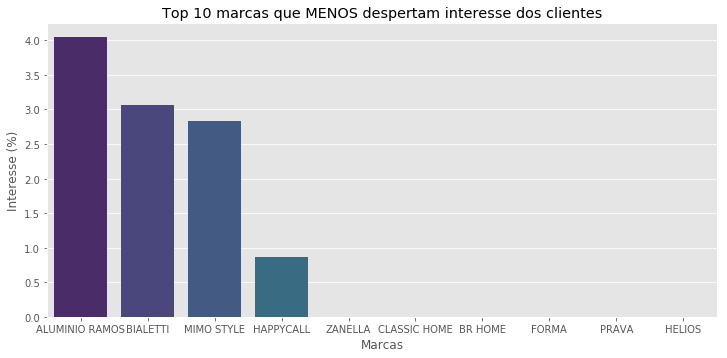

In [39]:
# Checando Top10 marcas que menos geram interesse nos clientes
marcas_int_top10 = marcas_int.tail(10)
plt.figure(figsize=(12,0.45*12))
plt.title('Top 10 marcas que MENOS despertam interesse dos clientes')
ax = sns.barplot(x=marcas_int_top10.index, y=marcas_int_top10['Interesse (%)'], palette='viridis')
plt.xlabel('Marcas');

No dataset, 6 marcas não despertam interesse nos clientes (Zanella, Classic Home, BR Home, Forma, Prava e Helios).

#### PROFUNDIDADE

In [40]:
ame['PROFUNDIDADE'].describe()

count    169462.000000
mean         34.340412
std          14.265679
min           2.500000
25%          19.800000
50%          38.000000
75%          47.000000
max          80.000000
Name: PROFUNDIDADE, dtype: float64

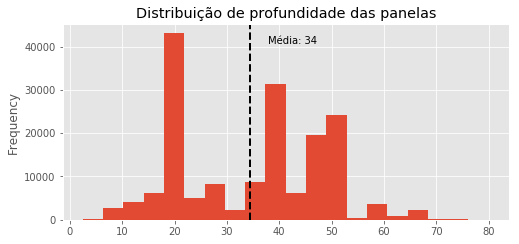

In [41]:
plt.figure(figsize=(8,0.45*8))
ame['PROFUNDIDADE'].plot.hist(bins=20)
plt.title('Distribuição de profundidade das panelas')

# Mostrando a média no gráfico
_, max_ = plt.ylim()
plt.text(ame['PROFUNDIDADE'].mean() + ame['PROFUNDIDADE'].mean()/10, 
         max_ - max_/10, 
         'Média: {:.0f}'.format(ame['PROFUNDIDADE'].mean()))
plt.axvline(ame['PROFUNDIDADE'].mean(), color='k', linestyle='dashed', linewidth=2);

#### TEMPO_GARANTIA

In [42]:
ame['TEMPO_GARANTIA'].describe()

count    169462.000000
mean          6.755568
std           3.483143
min           1.000000
25%           3.000000
50%           6.000000
75%          12.000000
max          12.000000
Name: TEMPO_GARANTIA, dtype: float64

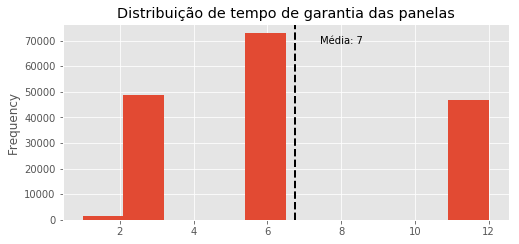

In [43]:
plt.figure(figsize=(8,0.45*8))
ame['TEMPO_GARANTIA'].plot.hist(bins=10)
plt.title('Distribuição de tempo de garantia das panelas')

# Mostrando a média no gráfico
_, max_ = plt.ylim()
plt.text(ame['TEMPO_GARANTIA'].mean() + ame['TEMPO_GARANTIA'].mean()/10, 
         max_ - max_/10, 
         'Média: {:.0f}'.format(ame['TEMPO_GARANTIA'].mean()))
plt.axvline(ame['TEMPO_GARANTIA'].mean(), color='k', linestyle='dashed', linewidth=2);

Observa-se um padrão no tempo de garantias, com 1, 3, 6 e 12 meses. Com as informações disponíveis no dataset, não é possível obter a informação se não existem produtos sem garantia ou se esses produtos, pelo modo que foram registrados na base de dados, estavam classificados com tempo de garantia nulo.

#### TEM FERRO FUNDIDO

In [44]:
ame['TEM_FERRO_FUNDIDO'].value_counts()

NAO    148805
SIM     20657
Name: TEM_FERRO_FUNDIDO, dtype: int64

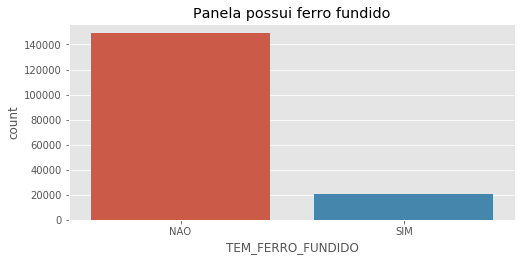

In [45]:
plt.figure(figsize=(8,0.45*8))
plt.title("Panela possui ferro fundido")
sns.countplot(ame['TEM_FERRO_FUNDIDO']);

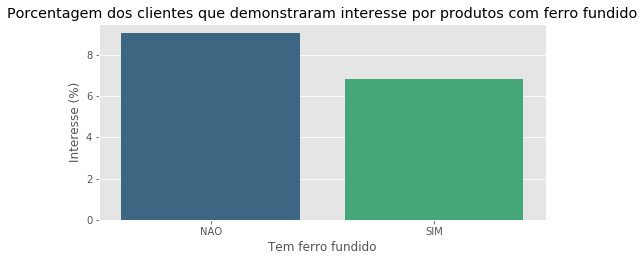

In [46]:
#Checando se mundanças nesta característica gera diferenças no interesse dos clientes
ferro_fundido_interesse = []
ferro_fundido_types = ame['TEM_FERRO_FUNDIDO'].unique() 

for i in ferro_fundido_types:
    ferro_fundido_interesse.append((ame[ame['TEM_FERRO_FUNDIDO'] == i]['INTERESTED'].mean())*100)

ferro_fundido_int = pd.DataFrame(data=ferro_fundido_interesse, index=ferro_fundido_types, columns=['Interesse (%)'])
ferro_fundido_int = ferro_fundido_int.sort_values(by='Interesse (%)', ascending=False)
plt.figure(figsize=(8,0.45*8))
plt.title('Porcentagem dos clientes que demonstraram interesse por produtos com ferro fundido')
ax = sns.barplot(x=ferro_fundido_int.index, y=ferro_fundido_int['Interesse (%)'], palette='viridis')
plt.xlabel('Tem ferro fundido');

Panelas sem ferro fundido despertam maior interesse dos clientes do dataset.

#### TEM GRELHA

In [47]:
ame['TEM_GRELHA'].value_counts()

NAO    149277
SIM     20185
Name: TEM_GRELHA, dtype: int64

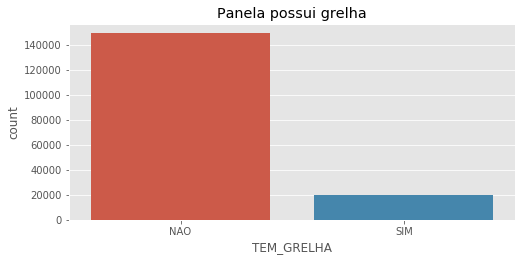

In [48]:
plt.figure(figsize=(8,0.45*8))
plt.title("Panela possui grelha")
sns.countplot(ame['TEM_GRELHA'], order = ['NAO', 'SIM']);

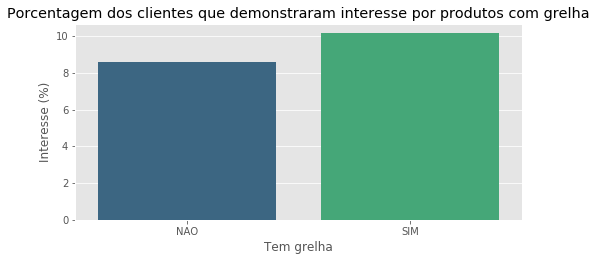

In [49]:
#Checando se mundanças nesta característica gera diferenças no interesse dos clientes
grelha_interesse = []
grelha_types = ame['TEM_GRELHA'].unique() 

for i in grelha_types:
    grelha_interesse.append((ame[ame['TEM_GRELHA'] == i]['INTERESTED'].mean())*100)

grelha_int = pd.DataFrame(data=grelha_interesse, index=grelha_types, columns=['Interesse (%)'])
grelha_int = grelha_int.sort_values(by='Interesse (%)', ascending=False)
plt.figure(figsize=(8,0.45*8))
plt.title('Porcentagem dos clientes que demonstraram interesse por produtos com grelha')
ax = sns.barplot(x=grelha_int.index, y=grelha_int['Interesse (%)'], palette='viridis', order = ['NAO', 'SIM'])
plt.xlabel('Tem grelha');

Ter grelha na panela desperta maior interesse nos clientes.

#### TEM TAMPA

In [50]:
ame['TEM_TAMPA'].value_counts()

0.0    90607
1.0    78855
Name: TEM_TAMPA, dtype: int64

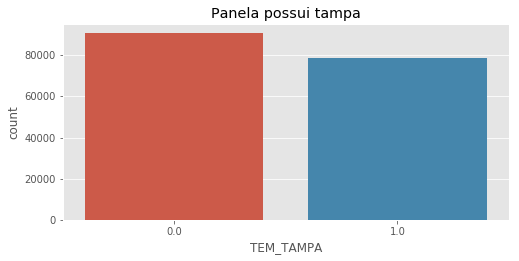

In [51]:
plt.figure(figsize=(8,0.45*8))
plt.title("Panela possui tampa")
sns.countplot(ame['TEM_TAMPA']);

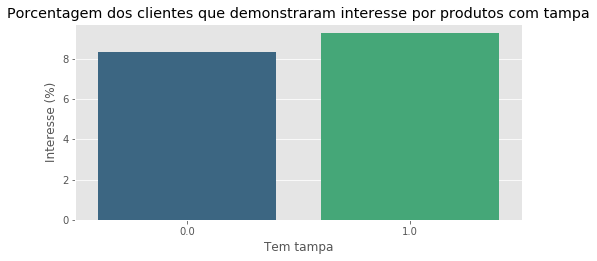

In [52]:
#Checando se mundanças nesta característica gera diferenças no interesse dos clientes
tampa_interesse = []
tampa_types = ame['TEM_TAMPA'].unique() 

for i in tampa_types:
    tampa_interesse.append((ame[ame['TEM_TAMPA'] == i]['INTERESTED'].mean())*100)

tampa_int = pd.DataFrame(data=tampa_interesse, index=tampa_types, columns=['Interesse (%)'])
tampa_int = tampa_int.sort_values(by='Interesse (%)', ascending=False)
plt.figure(figsize=(8,0.45*8))
plt.title('Porcentagem dos clientes que demonstraram interesse por produtos com tampa')
ax = sns.barplot(x=tampa_int.index, y=tampa_int['Interesse (%)'], palette='viridis')
plt.xlabel('Tem tampa');

Panelas com tampa despertam interesse ligeiramente maior nos clientes.

#### TIPO PRODUTO 

In [53]:
ame['TIPO_PRODUTO'].value_counts()

PANELA             58372
PIPOQUEIRA         28246
CHALEIRA           17348
FRIGIDEIRA         14343
CACAROLA           13450
ESPAGUETEIRA        7572
CUSCUZEIRA          6852
CHAPA               4965
WOK                 4829
FERVEDOR            2387
CALDEIRAO           2056
GRILL               1156
BIFETEIRA            745
PANQUEQUEIRA         703
LEITEIRA             694
BULE                 680
FORMA                608
FRITADEIRA           552
PAELLERA             532
OMELETEIRA           504
COZI-VAPORE          496
FOGAREIRO            382
ASSADEIRA            368
MINI-CACAROLA        354
CREMEIRA             303
SANDUICHEIRA         242
TAMPA                185
FONDUE               141
CUMBUCA              119
PRENSADOR            102
COZI-PASTA            67
CUSCUZEIRO            49
PAPEIRO               35
CANECA/FERVEDOR       13
VAPORELLA              7
CANECO                 5
Name: TIPO_PRODUTO, dtype: int64

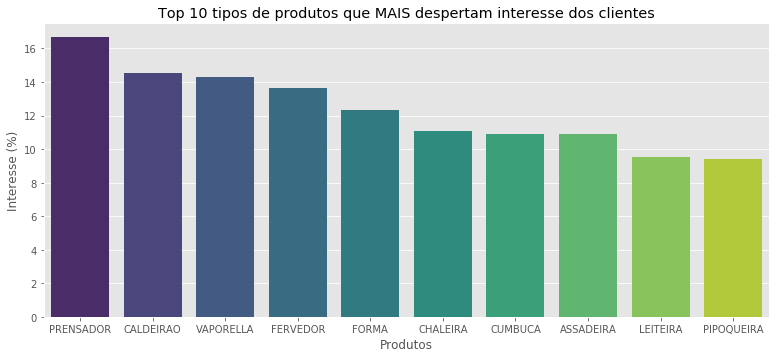

In [54]:
# Checando Top10 produtos que mais geram interesse nos clientes
produto_interesse = []
produto_types = ame['TIPO_PRODUTO'].unique() 

for i in produto_types:
    produto_interesse.append((ame[ame['TIPO_PRODUTO'] == i]['INTERESTED'].mean())*100)

produtos_int = pd.DataFrame(data=produto_interesse, index=produto_types, columns=['Interesse (%)'])
produtos_int = produtos_int.sort_values(by='Interesse (%)', ascending=False)
produtos_int_top10 = produtos_int.head(10)
plt.figure(figsize=(13,0.45*12))
plt.title('Top 10 tipos de produtos que MAIS despertam interesse dos clientes')
ax = sns.barplot(x=produtos_int_top10.index, y=produtos_int_top10['Interesse (%)'], palette='viridis')
plt.xlabel('Produtos');

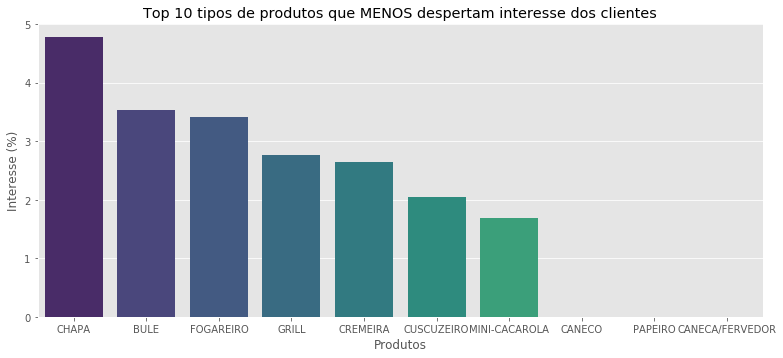

In [55]:
# Checando Top10 marcas que menos geram interesse nos clientes
produtos_int_top10 = produtos_int.tail(10)
plt.figure(figsize=(13,0.45*12))
plt.title('Top 10 tipos de produtos que MENOS despertam interesse dos clientes')
ax = sns.barplot(x=produtos_int_top10.index, y=produtos_int_top10['Interesse (%)'], palette='viridis')
plt.xlabel('Produtos');

Panelas do tipo 'Prensador', 'Caldeirão' e 'Vaporella' são os campeões de interesse do dataset. Já panelas do tipo 'Caneco', 'Papeiro' e 'Caneca/Fervedor' não despertaram interesse nos clientes.

#### TIPO_WOK 

In [56]:
ame['TIPO_WOK'].value_counts()

NAO    134661
SIM     34801
Name: TIPO_WOK, dtype: int64

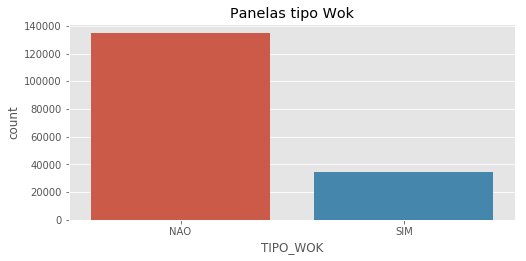

In [57]:
plt.figure(figsize=(8,0.45*8))
plt.title("Panelas tipo Wok")
sns.countplot(ame['TIPO_WOK']);

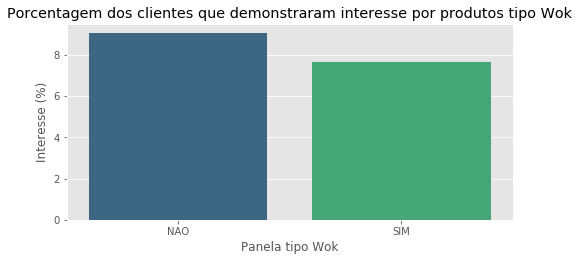

In [58]:
#Checando se mundanças nesta característica gera diferenças no interesse dos clientes
wok_interesse = []
wok_types = ame['TIPO_WOK'].unique() 

for i in wok_types:
    wok_interesse.append((ame[ame['TIPO_WOK'] == i]['INTERESTED'].mean())*100)

wok_int = pd.DataFrame(data=wok_interesse, index=wok_types, columns=['Interesse (%)'])
wok_int = wok_int.sort_values(by='Interesse (%)', ascending=False)
plt.figure(figsize=(8,0.45*8))
plt.title('Porcentagem dos clientes que demonstraram interesse por produtos tipo Wok')
ax = sns.barplot(x=wok_int.index, y=wok_int['Interesse (%)'], palette='viridis')
plt.xlabel('Panela tipo Wok');

Panelas tipo Wok despertam menor interesse nos clientes do dataset.

#### ITEM_PRICE

In [59]:
ame['ITEM_PRICE'].describe()

count    169462.000000
mean        106.631945
std          48.749694
min          12.345000
25%          76.098367
50%         101.302000
75%         129.990000
max         242.550000
Name: ITEM_PRICE, dtype: float64

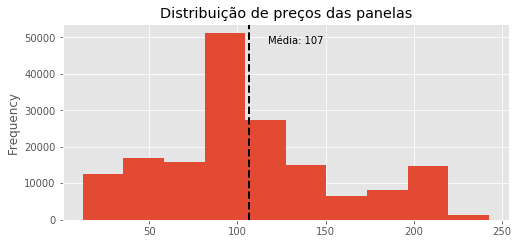

In [60]:
# Distribuição dos preços
plt.figure(figsize=(8,0.45*8))
ame['ITEM_PRICE'].plot.hist(bins=10)
plt.title('Distribuição de preços das panelas')
plt.axvline(ame['ITEM_PRICE'].mean(), color='k', linestyle='dashed', linewidth=2)

# Mostrando a média no gráfico
_, max_ = plt.ylim()
plt.text(ame['ITEM_PRICE'].mean() + ame['ITEM_PRICE'].mean()/10, 
         max_ - max_/10, 
         'Média: {:.0f}'.format(ame['ITEM_PRICE'].mean()));

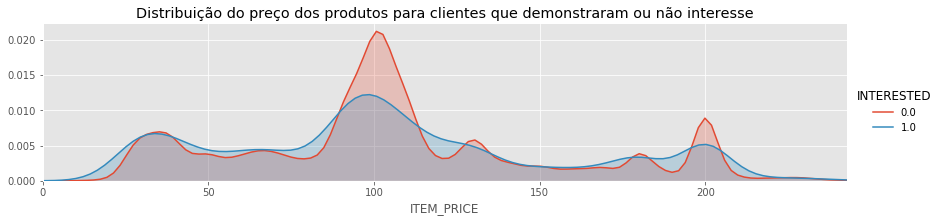

In [61]:
# Gráfico com distribuição do preço do produto segregado em clientes que demonstraram ou não interesse
a = sns.FacetGrid(ame, hue = 'INTERESTED', aspect=4)
a.map(sns.kdeplot, 'ITEM_PRICE', shade= True)
a.set(xlim=(0 , ame['ITEM_PRICE'].max()))
a.add_legend()
plt.title('Distribuição do preço dos produtos para clientes que demonstraram ou não interesse');

Variações do preço das panelas parecem pouco alterar o comportamento de interesse dos clientes.

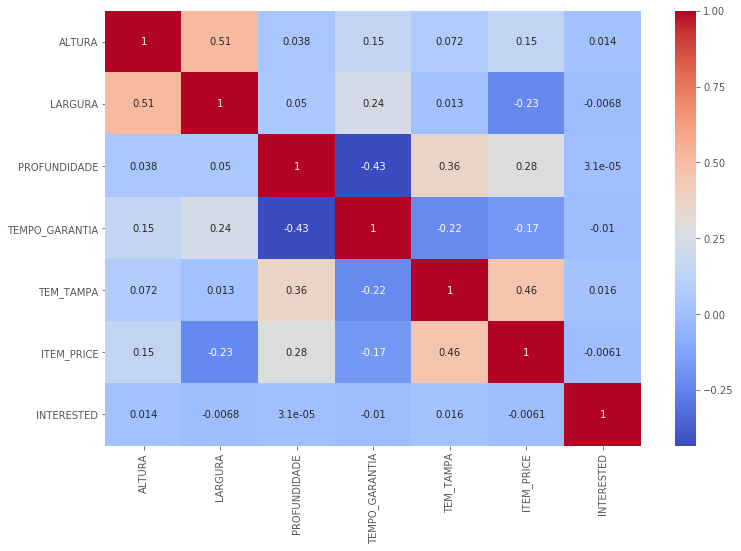

In [62]:
plt.subplots(figsize = (12,8))
correlation = ame.corr()
sns.heatmap(correlation, annot=True,cmap='coolwarm');

In [63]:
correlation['ITEM_PRICE']

ALTURA            0.148339
LARGURA          -0.227245
PROFUNDIDADE      0.276851
TEMPO_GARANTIA   -0.171449
TEM_TAMPA         0.462982
ITEM_PRICE        1.000000
INTERESTED       -0.006067
Name: ITEM_PRICE, dtype: float64

Analisando a correlação entre os dados numéricos do dataset, podemos observar que existe um baixa correlação entre o interesse do consumidor com características do produto. Outro fato relevante, é o fato de o preço tem baixa correlação com o interesse dos clientes. Também vale ressaltar a correlação negativa entre o tempo de garantia e o preço dos produtos.

## <font color='red'> Preparação dos dados</font>

In [64]:
# Criando dummies para as variáveis categoricas
ame = pd.get_dummies(ame)

In [65]:
# Checando novo Shape do Dataset
ame.shape

(169462, 111)

In [67]:
# Padronizando variáveis não binárias
ame_ajustado = ame.copy()
col_nomes = ['ALTURA','LARGURA','PROFUNDIDADE','TEMPO_GARANTIA','ITEM_PRICE']
features = ame_ajustado[col_nomes]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
ame_ajustado[col_nomes] = features

In [68]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(ame_ajustado.drop('INTERESTED',axis=1), 
                                                    ame_ajustado['INTERESTED'], test_size=0.30, 
                                                    random_state=101)

## <font color='red'> Rodando modelos de Machine Learning </font>

In [73]:
# LogisticRegression

logistica = LogisticRegression()
logistica.fit(X_train, y_train)

predictions_logistica = logistica.predict(X_test)

# Sumário do score das previsões feitas pelo modelo
print(classification_report(y_test, predictions_logistica))
print(confusion_matrix(y_test, predictions_logistica))
print()

# Acurácia do modelo
lr_acuracia = accuracy_score(y_test, predictions_logistica)
print('Acurácia do modelo: %s' %lr_acuracia)

# ROC AUC do modelo
lr_roc_score = roc_auc_score(y_test, predictions_logistica)
print('Área da curva ROC: %s' %lr_roc_score)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     46449
         1.0       0.00      0.00      0.00      4390

   micro avg       0.91      0.91      0.91     50839
   macro avg       0.46      0.50      0.48     50839
weighted avg       0.83      0.91      0.87     50839

[[46449     0]
 [ 4390     0]]

Acurácia do modelo: 0.913648970278723
Área da curva ROC: 0.5


In [74]:
# Decision Tree's

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

predictions_dt = dt.predict(X_test)

# Sumário do score das previsões feitas pelo modelo
print(classification_report(y_test, predictions_dt))
print(confusion_matrix(y_test, predictions_dt))
print()

# Acurácia do modelo
dt_acuracia = accuracy_score(y_test, predictions_dt)
print('Acurácia do modelo: %s' %dt_acuracia)

# ROC AUC do modelo
dt_roc_score = roc_auc_score(y_test, predictions_dt)
print('Área da curva ROC: %s' %dt_roc_score)

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     46449
         1.0       0.85      0.19      0.31      4390

   micro avg       0.93      0.93      0.93     50839
   macro avg       0.89      0.59      0.63     50839
weighted avg       0.92      0.93      0.90     50839

[[46306   143]
 [ 3572   818]]

Acurácia do modelo: 0.9269261787210606
Área da curva ROC: 0.5916269643179325


In [75]:
# Random Forest

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

predictions_rf = rf.predict(X_test)

# Sumário do score das previsões feitas pelo modelo
print(classification_report(y_test, predictions_rf))
print(confusion_matrix(y_test, predictions_rf))
print()

# Acurácia do modelo
rf_acuracia = accuracy_score(y_test, predictions_rf)
print('Acurácia do modelo: %s' %rf_acuracia)

# ROC AUC do modelo
rf_roc_score = roc_auc_score(y_test, predictions_rf)
print('Área da curva ROC: %s' %rf_roc_score)

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     46449
         1.0       0.83      0.19      0.31      4390

   micro avg       0.93      0.93      0.93     50839
   macro avg       0.88      0.59      0.63     50839
weighted avg       0.92      0.93      0.90     50839

[[46284   165]
 [ 3567   823]]

Acurácia do modelo: 0.9265917897676981
Área da curva ROC: 0.5919596215233196


In [76]:
# Selecionando melhores parâmetros para modelo Random Forest
# Definição dos parâmetros
param_dist = {"max_depth": [1, 3, 7, 8, 12, None],
              "criterion": ['gini', 'entropy'],
              "max_features": [8, 9, 10, 11, 16, 22],
              "min_samples_split": [8, 10, 11, 14, 16, 19],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "bootstrap": [True, False]}

# Para o classificador criado na célula anterior, testamos diferentes combinações de parâmetros
rsearch = RandomizedSearchCV(rf, param_distributions = param_dist, scoring = 'roc_auc', n_iter = 25, return_train_score=True)  

# Aplicando o resultado ao conjunto de dados de treino e obtendo o score
rsearch.fit(X_train,y_train)

### ALTERACAO PARA cv_results_
rsearch.cv_results_

# Imprimindo o melhor estimador
bestrf = rsearch.best_estimator_
print (bestrf)

# Aplicando o melhor estimador para realizar as previsões
predictions_bestrf = bestrf.predict(X_test)

# Sumário do score das previsões feitas pelo modelo
print(classification_report(y_test, predictions_bestrf))
print(confusion_matrix(y_test, predictions_bestrf))
print()

# Acurácia do modelo
bestrf_acuracia = accuracy_score(y_test, predictions_bestrf)
print('Acurácia do modelo: %s' %bestrf_acuracia)

# ROC AUC do modelo
bestrf_roc_score = roc_auc_score(y_test, predictions_bestrf)
print('Área da curva ROC: %s' %bestrf_roc_score)

RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features=10,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=14, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     46449
         1.0       0.89      0.18      0.30      4390

   micro avg       0.93      0.93      0.93     50839
   macro avg       0.91      0.59      0.63     50839
weighted avg       0.92      0.93      0.90     50839

[[46354    95]
 [ 3608   782]]

Acurácia do modelo: 0.9271622179822577
Área da curva ROC: 0.5880434322583012


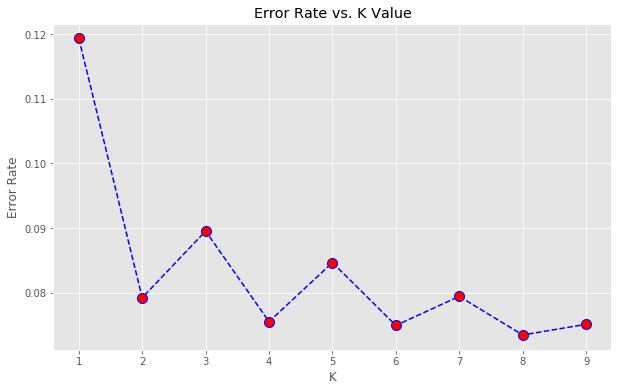

In [77]:
# K-Nearest Neighbours: encontrando melhor valor de n
error_rate = []

for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [78]:
# K-Nearest Neighbours

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

predictions_knn = knn.predict(X_test)

# Sumário do score das previsões feitas pelo modelo
print(classification_report(y_test, predictions_knn))
print(confusion_matrix(y_test, predictions_knn))
print()

# Acurácia do modelo
knn_acuracia = accuracy_score(y_test, predictions_knn)
print('Acurácia do modelo: %s' %knn_acuracia)

# ROC AUC do modelo
knn_roc_score = roc_auc_score(y_test, predictions_knn)
print('Área da curva ROC: %s' %knn_roc_score)

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     46449
         1.0       0.75      0.20      0.32      4390

   micro avg       0.93      0.93      0.93     50839
   macro avg       0.84      0.60      0.64     50839
weighted avg       0.91      0.93      0.90     50839

[[46148   301]
 [ 3507   883]]

Acurácia do modelo: 0.925096874446783
Área da curva ROC: 0.5973293632701033


In [97]:
# ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators = 500)
etc.fit(X_train, y_train)

predictions_etc = etc.predict(X_test)

# Sumário do score das previsões feitas pelo modelo
print(classification_report(y_test, predictions_etc))
print(confusion_matrix(y_test, predictions_etc))
print()

# Acurácia do modelo
etc_acuracia = accuracy_score(y_test, predictions_etc)
print('Acurácia do modelo: %s' %etc_acuracia)

# ROC AUC do modelo
etc_roc_score = roc_auc_score(y_test, predictions_etc)
print('Área da curva ROC: %s' %etc_roc_score)

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     46449
         1.0       0.86      0.19      0.31      4390

   micro avg       0.93      0.93      0.93     50839
   macro avg       0.89      0.59      0.63     50839
weighted avg       0.92      0.93      0.90     50839

[[46312   137]
 [ 3570   820]]

Acurácia do modelo: 0.9270835382285253
Área da curva ROC: 0.5919193417170845


In [98]:
# Selecionando melhores parâmetros para modelo ExtraTreeClassifier
# Definição dos parâmetros
param_dist = {"max_depth": [1, 3, 7, 8, 12, None],
              "criterion": ['gini', 'entropy'],
              "max_features": [8, 9, 10, 11, 16, 22],
              "min_samples_split": [8, 10, 11, 14, 16, 19],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7]}

# Para o classificador criado na célula anterior, testamos diferentes combinações de parâmetros
rsearch = RandomizedSearchCV(etc, param_distributions = param_dist, n_iter = 25, return_train_score=True)  

# Aplicando o resultado ao conjunto de dados de treino e obtendo o score
rsearch.fit(X_train,y_train)

### ALTERACAO PARA cv_results_
rsearch.cv_results_

# Imprimindo o melhor estimador
bestetc = rsearch.best_estimator_
print(bestetc)

# Aplicando o melhor estimador para realizar as previsões
predictions_bestetc = bestetc.predict(X_test)

# Sumário do score das previsões feitas pelo modelo
print(classification_report(y_test, predictions_bestetc))
print(confusion_matrix(y_test, predictions_bestetc))
print()

# Acurácia do modelo
bestetc_acuracia = accuracy_score(y_test, predictions_bestetc)
print('Acurácia do modelo: %s' %bestetc_acuracia)

# ROC AUC do modelo
bestetc_roc_score = roc_auc_score(y_test, predictions_bestetc)
print('Área da curva ROC: %s' %bestetc_roc_score)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=10, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     46449
         1.0       0.89      0.06      0.12      4390

   micro avg       0.92      0.92      0.92     50839
   macro avg       0.91      0.53      0.54     50839
weighted avg       0.92      0.92      0.88     50839

[[46416    33]
 [ 4116   274]]

Acurácia do modelo: 0.9183894254410984
Área da curva ROC: 0.5308520609789236


In [82]:
# Bagging Classifier

bagging = BaggingClassifier()
bagging.fit(X_train, y_train)

predictions_bagging = bagging.predict(X_test)

# Sumário do score das previsões feitas pelo modelo
print(classification_report(y_test, predictions_bagging))
print(confusion_matrix(y_test, predictions_bagging))
print()

# Acurácia do modelo
bagging_acuracia = accuracy_score(y_test, predictions_bagging)
print('Acurácia do modelo: %s' %bagging_acuracia)

# ROC AUC do modelo
bagging_roc_score = roc_auc_score(y_test, predictions_bagging)
print('Área da curva ROC: %s' %bagging_roc_score)

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     46449
         1.0       0.84      0.18      0.30      4390

   micro avg       0.93      0.93      0.93     50839
   macro avg       0.88      0.59      0.63     50839
weighted avg       0.92      0.93      0.90     50839

[[46294   155]
 [ 3584   806]]

Acurácia do modelo: 0.9264541001986664
Área da curva ROC: 0.5901310477884212


In [83]:
# AdaBoost Classifier

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

predictions_adaboost = adaboost.predict(X_test)

# Sumário do score das previsões feitas pelo modelo
print(classification_report(y_test, predictions_adaboost))
print(confusion_matrix(y_test, predictions_adaboost))
print()

# Acurácia do modelo
adaboost_acuracia = accuracy_score(y_test, predictions_adaboost)
print('Acurácia do modelo: %s' %adaboost_acuracia)

# ROC AUC do modelo
adaboost_roc_score = roc_auc_score(y_test, predictions_adaboost)
print('Área da curva ROC: %s' %adaboost_roc_score)

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     46449
         1.0       0.00      0.00      0.00      4390

   micro avg       0.91      0.91      0.91     50839
   macro avg       0.46      0.50      0.48     50839
weighted avg       0.83      0.91      0.87     50839

[[46449     0]
 [ 4390     0]]

Acurácia do modelo: 0.913648970278723
Área da curva ROC: 0.5


In [84]:
# Gradient Boosting Classifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

predictions_gbc = gbc.predict(X_test)

# Sumário do score das previsões feitas pelo modelo
print(classification_report(y_test, predictions_gbc))
print(confusion_matrix(y_test, predictions_gbc))
print()

# Acurácia do modelo
gbc_acuracia = accuracy_score(y_test, predictions_gbc)
print('Acurácia do modelo: %s' %gbc_acuracia)

# ROC AUC do modelo
gbc_roc_score = roc_auc_score(y_test, predictions_gbc)
print('Área da curva ROC: %s' %gbc_roc_score)

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     46449
         1.0       1.00      0.04      0.08      4390

   micro avg       0.92      0.92      0.92     50839
   macro avg       0.96      0.52      0.52     50839
weighted avg       0.92      0.92      0.88     50839

[[46449     0]
 [ 4200   190]]

Acurácia do modelo: 0.9173862585810106
Área da curva ROC: 0.5216400911161732


In [105]:
# LightGBM
import lightgbm as lgb

# Create the model
lightgbm = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

# Train the model
lightgbm.fit(X_train, y_train, eval_metric = 'auc')

# Record the best iteration
best_iteration = lightgbm.best_iteration_
               
# Make predictions
pred = lightgbm.predict(X_test, num_iteration = best_iteration)

# Acurácia do modelo
xg_acuracia = accuracy_score(y_test, pred)
print('Acurácia do modelo: %s' %xg_acuracia)

# ROC AUC do modelo
xg_roc_score = roc_auc_score(y_test, pred)
print('Área da curva ROC: %s' %xg_roc_score)

Acurácia do modelo: 0.9244477664784909
Área da curva ROC: 0.5770699056073991


## <font color='red'> Tabela com acurácia de todos os modelos testados</font>

In [172]:
# Criando tabela com melhores modelos ordenados por score

models = pd.DataFrame({
    'Model': ['LogisticRegression', 'Decision Tree', 'Random Forest', 'Best Random Forest', 'K-Nearest Neighbours', 
              'ExtraTreeClassifier', 'Best ExtraTreeClassifier', 'Bagging classifier', 'AdaBoost classifier', 
              'Gradient Boosting Classifier', 'LightGBM'],
    'Acurácia Score': [ lr_acuracia, dt_acuracia, rf_acuracia, bestrf_acuracia, knn_acuracia, etc_acuracia, 
                       bestetc_acuracia, bagging_acuracia, adaboost_acuracia, gbc_acuracia, xg_acuracia],
    'ROC AUC': [ lr_roc_score, dt_roc_score, rf_roc_score, bestrf_roc_score, knn_roc_score, etc_roc_score, bestetc_roc_score, 
                       bagging_roc_score, adaboost_roc_score, gbc_roc_score, xg_roc_score]})
models.set_index('Model', inplace=True)
models.sort_values(by='Acurácia Score', ascending=False)

,Acurácia Score,ROC AUC
Model,,
Best Random Forest,0.927162,0.588043
ExtraTreeClassifier,0.927084,0.591919
Decision Tree,0.926926,0.591627
Random Forest,0.926592,0.591960
Bagging classifier,0.926454,0.590131
K-Nearest Neighbours,0.925097,0.597329
LightGBM,0.924448,0.577070
Best ExtraTreeClassifier,0.918389,0.530852
Gradient Boosting Classifier,0.917386,0.521640


O modelo de Random Forest se mostrou o modelo com maior acurácia. Vamos verificar quais variáveis são as mais importantes para o interesse dos clientes.

## <font color='red'> Importância das variáveis </font>

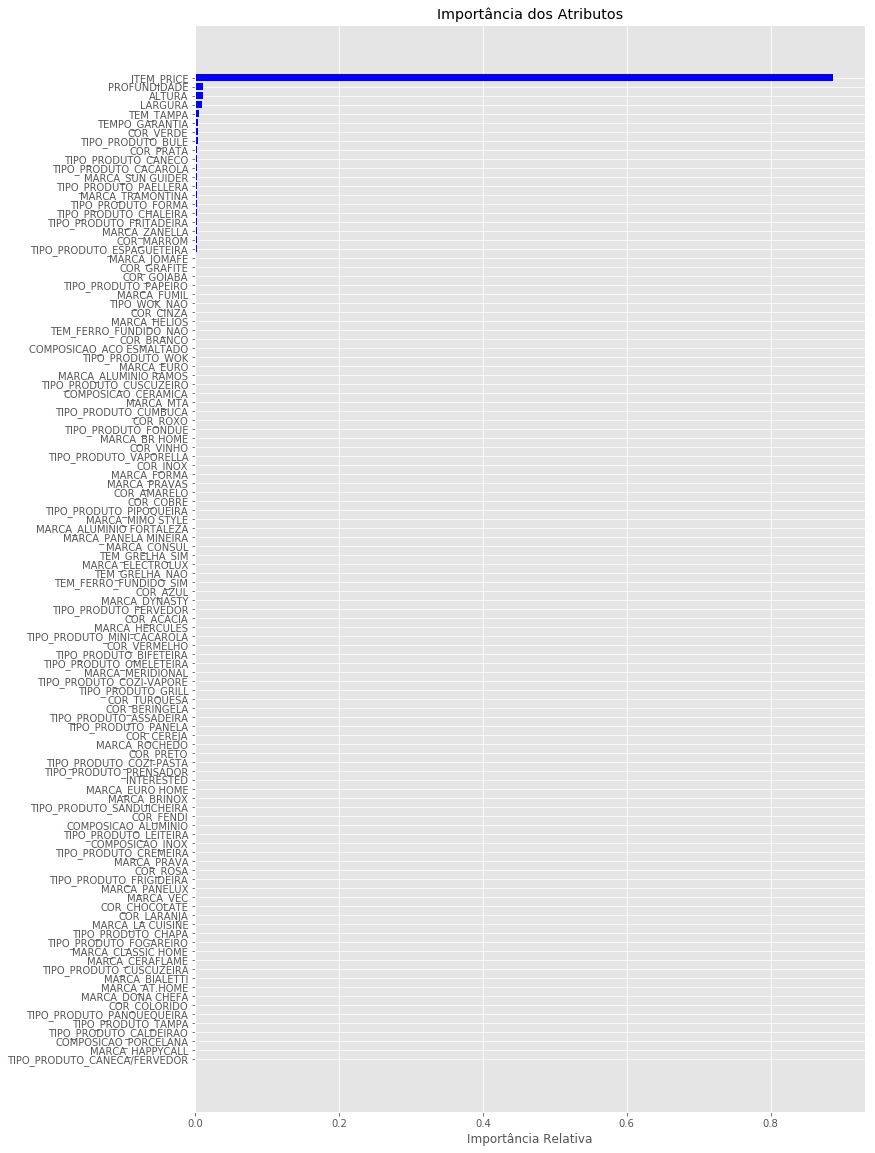

In [141]:
# Extraindo a importância
importances = bestetc.feature_importances_
indices = np.argsort(importances)

# Obtém os índices
ind = []
labels = ame_ajustado.columns
for i in indices:
    ind.append(labels[i])

# Plot da Importância dos Atributos
plt.figure(figsize=(12,20))
plt.title('Importância dos Atributos')
plt.barh(range(len(indices)), importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)),ind)
plt.xlabel('Importância Relativa')
plt.show()

### De acordo com o modelo a variável que mais impacta o interesse dos clientes é o preço do produto, seguido por características da panela como, profundidade, altura, largura, se tem tampa, tempo de garantia e cor.